In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from funcs.ffd import fit_beta_to_powerlaw, plot_powerlaw

In [2]:
df = pd.read_csv("../flare_tables/20200218_vetted_flares.csv",
                names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
                    'istart', 'istop','total_n_valid_data_points', 
                    'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
            'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
            'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
            'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
            'ed_corr_err','amplitude_corr_err','duration_corr_err',"TIC","sector"])
              
#spts = pd.read_csv("../flare_tables/spts.csv")

#spts.head()
#df = df.merge(spts[["TIC","spt","TESSmag"]],on="TIC")
df.head()

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop,...,recovery_probability_count,ed_ratio_std,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,TIC,sector
0,0.054356,119297,119306,35.835830,1.763268,4923,4932,12835.0,1393.151454,1393.163954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.101038,152637,152644,30.406816,1.828507,586,593,16349.0,1439.452361,1439.462083,...,33.0,0.124723,0.135370,0.292849,0.331434,7.910980,0.017503,0.005243,NaN,NaN
2,0.018912,159470,159473,5.704301,0.547990,7393,7396,16349.0,1448.940559,1448.944725,...,34.0,0.128436,0.145729,0.256401,0.507519,2.038336,0.003150,0.004284,NaN,NaN
3,0.028682,164325,164340,28.611778,0.814129,10837,10852,16349.0,1455.683582,1455.704416,...,26.0,0.093004,0.093889,0.272593,0.000000,5.385723,0.003042,0.008833,NaN,NaN
4,0.028935,167643,167655,20.634373,0.626127,14148,14160,16349.0,1460.291909,1460.308576,...,33.0,0.093004,0.093889,0.272593,0.000000,3.890185,0.003069,0.007066,NaN,NaN


In [3]:
df.shape

(385, 31)

In [4]:
df = df[df.istart-df.istop < -5]

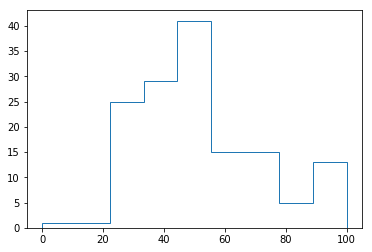

In [5]:
plt.hist(df.recovery_probability_count, bins=np.linspace(0,100,10), histtype="step");

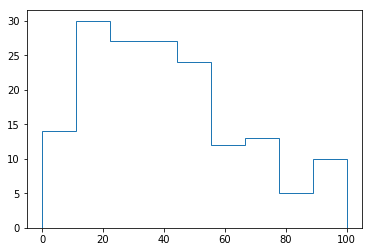

In [6]:
plt.hist(df.ed_ratio_count, bins=np.linspace(0,100,10), histtype="step");

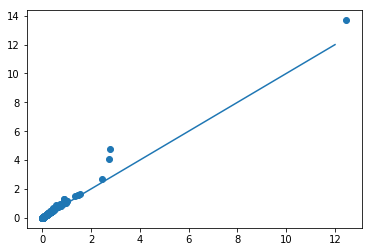

In [7]:
plt.scatter(df.ampl_rec, df.amplitude_corr)
plt.plot([0,12],[0,12])

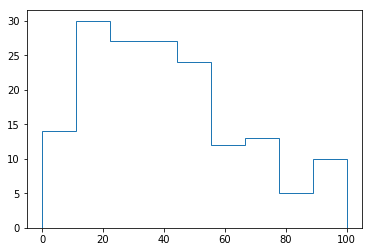

In [8]:
plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,100,10), histtype="step");

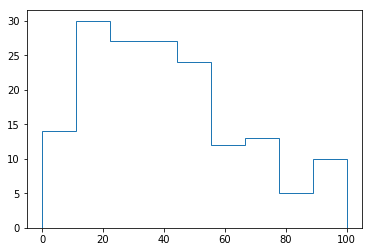

In [9]:
plt.hist(df.duration_ratio_count, bins=np.linspace(0,100,10), histtype="step");

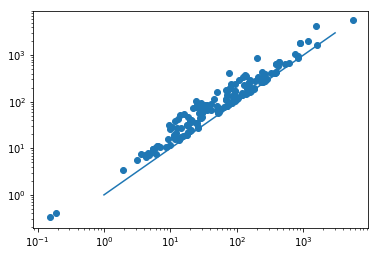

In [10]:
plt.scatter(df.ed_rec, df.ed_corr)
plt.plot([1,3e3],[1,3e3])
plt.yscale("log")
plt.xscale("log")

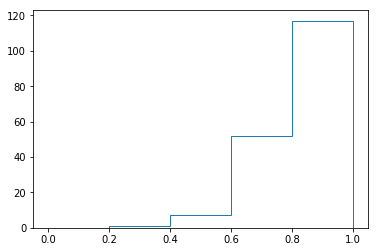

In [11]:
plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

In [12]:
#correct for magnitudes
plt.figure(figsize=(6.5,5.5))
#plt.hist(df.TESSmag, bins=20)


<Figure size 468x396 with 0 Axes>

<Figure size 468x396 with 0 Axes>

In [13]:
df = df[~np.isnan(df.recovery_probability)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
df["encorrprob"] = 1./df.recovery_probability.values

In [14]:
freq

NameError: name 'freq' is not defined

In [ ]:
#df[df.TESSmag>10].TESSmag.hist()

In [ ]:
#df = df[df.TESSmag>10]

In [ ]:
#df[['ed_rec', 'ed_corr','TIC',"sector", "TESSmag"]].tail(25)

In [15]:
df.TIC = np.arange(df.shape[0])

581.8499111024673


(5544.188867671135, 1340.3970032378065, 0.0005929247797337993)

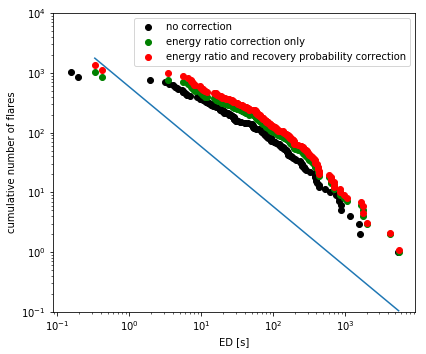

In [52]:
df = df[~np.isnan(df.recovery_probability) & (df.recovery_probability > 0)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr)]
#df["encorrprob"] = 1./df.recovery_probability.values/np.array(freq)
df = df.sort_values(by="ed_corr", ascending=True)
freq = []
for i in range(df.shape[0]):
    f = df.iloc[:i+1]
    freq.append(len(set(f.TIC.values)))

df = df.sort_values(by="ed_corr", ascending=False)

#for spt, df in F.groupby("spt"):
    #print(la)
    #df = df[(df.TESSmag > 11.14) & (df.TESSmag <11.3)]
fig, ax = plt.subplots(1,figsize=(6.5,5.5))
plt.scatter(df.ed_rec.sort_values(ascending=False), np.cumsum(1/np.array(freq[::-1])*len(freq)), c="k", label="no correction")
plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1/np.array(freq[::-1]))*len(freq), c="g", label="energy ratio correction only")
plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1./df.recovery_probability.values/np.array(freq[::-1]))*len(freq), c="r", label="energy ratio and recovery probability correction")
#plt.scatter(df.ed_corr.sort_values(ascending=False), np.cumsum(1./df.recovery_probability.values), c="orange", label="energy ratio and recovery probability correction")


a = df.ed_corr.values
f = np.cumsum(1./df.recovery_probability.values/np.array(freq[::-1]))*len(freq)
alpha,alpha_err = 2., .2
#print(a)#, np.delete(a,0),len(freq))
beta, beta_err = fit_beta_to_powerlaw(a,f, alpha, alpha_err,1)

#fig, ax = plt.subplots(1,figsize=(10,8))
plot_powerlaw(ax, a, alpha, beta, mode="ED")
plt.plot([10,1000],[1/177,1/177])
plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
#plt.title(spt)
plt.legend()
#     plt.figure(figsize=(6.5,5.5))
#     plt.hist(df.TESSmag)
#     plt.title(spt)
# #plt.savefig("plots/{}_FFD_two_step_correction.png".format(today), dpi=300)
plt.ylim(1e-1,1e4)
a[0],f[-1], 3.28728696316649/a[0]

In [36]:
f[0], 1/164

(0.0061016949152542365, 0.006097560975609756)

In [ ]:
#df = df[df.recovery_probability > .2]


df = df.sort_values(by="ed_rec", ascending=False)
df['probnocorrcum'] = np.cumsum(1/np.array(freq[::-1])*freq[-1])
df['sortededrec'] =df.ed_rec.sort_values(ascending=False)
df = df.sort_values(by="ed_corr", ascending=False)
df = df[(~df.ed_corr.isnull()) & (np.isfinite(df.ed_corr)) & (df.recovery_probability >0.10) ]
df["ed_corrprob"] = 1/df.recovery_probability.values/np.array(freq[::-1])*freq[-1]
df["ed_corrprob_err"] = df.recovery_probability_std / df.recovery_probability**2
df["ed_corrprobcum"] = np.cumsum(df.ed_corrprob.values)


plt.figure(figsize=(6.5,5.5))
for l, row in df.iterrows():
    plt.plot([row.sortededrec, row.ed_corr], [row.probnocorrcum, row.ed_corrprobcum],c="grey",alpha=.5)
plt.scatter(df["sortededrec"], df["probnocorrcum"], label="no correction", c="k")#, condition {}".format(label))
plt.scatter(df.ed_corr, df["ed_corrprobcum"], label="energy ratio and recovery probability correction", c="r")#, condition {}".format(label))
plt.plot([10, 4000],[4000, 10], label="slope=-1", linestyle="dashed", c="grey", linewidth=3)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(.8,250)
#plt.xlim(5,4000)
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_flare_correspondence_correction.png".format(today), dpi=300)

In [ ]:
df.shape